<a href="https://colab.research.google.com/github/harshavardhansannithi/ARDS-using-Machine-learning/blob/main/KNN_vs_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset (replace with your actual data)
data = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")

# Separate features and target variable
X = data.drop("LUNG_RECRUITMENT", axis=1)
y = data["LUNG_RECRUITMENT"]

from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Assuming X is your feature matrix
# Identify and encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Now, you can proceed with feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled is now your scaled feature matrix



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN Model
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Experiment with different k values
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Decision Tree Model
dt_clf = DecisionTreeClassifier(max_depth=5)  # Experiment with hyperparameters
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred_knn are your true labels and predicted labels for KNN
print("KNN:")
print(f"Precision: {precision_score(y_test, y_pred_knn, pos_label='YES')}")
print(f"Recall: {recall_score(y_test, y_pred_knn, pos_label='YES')}")
print(f"F1-score: {f1_score(y_test, y_pred_knn, pos_label='YES')}")

#Accuracy
score_knn = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")


print("\nDecision Tree:")
print(f"Precision: {precision_score(y_test, y_pred_dt,pos_label='YES')}")
print(f"Recall: {recall_score(y_test, y_pred_dt,pos_label='YES')}")
print(f"F1-score: {f1_score(y_test, y_pred_dt,pos_label='YES')}")

#Accuracy
score_dt = round(accuracy_score(y_test, y_pred_dt)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_dt)+" %")

# Hyperparameter tuning and other comparisons (optional)
# - Experiment with different k values for KNN and hyperparameters for Decision Tree (max_depth, min_samples_split, etc.).
# - Use cross-validation for more robust evaluation.
# - Consider additional metrics like AUC-ROC, confusion matrix, or interpretability measures.



KNN:
Precision: 0.9651162790697675
Recall: 0.9651162790697675
F1-score: 0.9651162790697675
The accuracy score achieved using KNN is: 93.55 %

Decision Tree:
Precision: 0.9876543209876543
Recall: 0.9302325581395349
F1-score: 0.9580838323353293
The accuracy score achieved using KNN is: 92.47 %


In [7]:
scores = [score_dt,score_knn]
algorithms = ["Decision Tree","K-Nearest Neighbors"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Decision Tree is: 92.47 %
The accuracy score achieved using K-Nearest Neighbors is: 93.55 %


In [8]:
import seaborn as sns

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

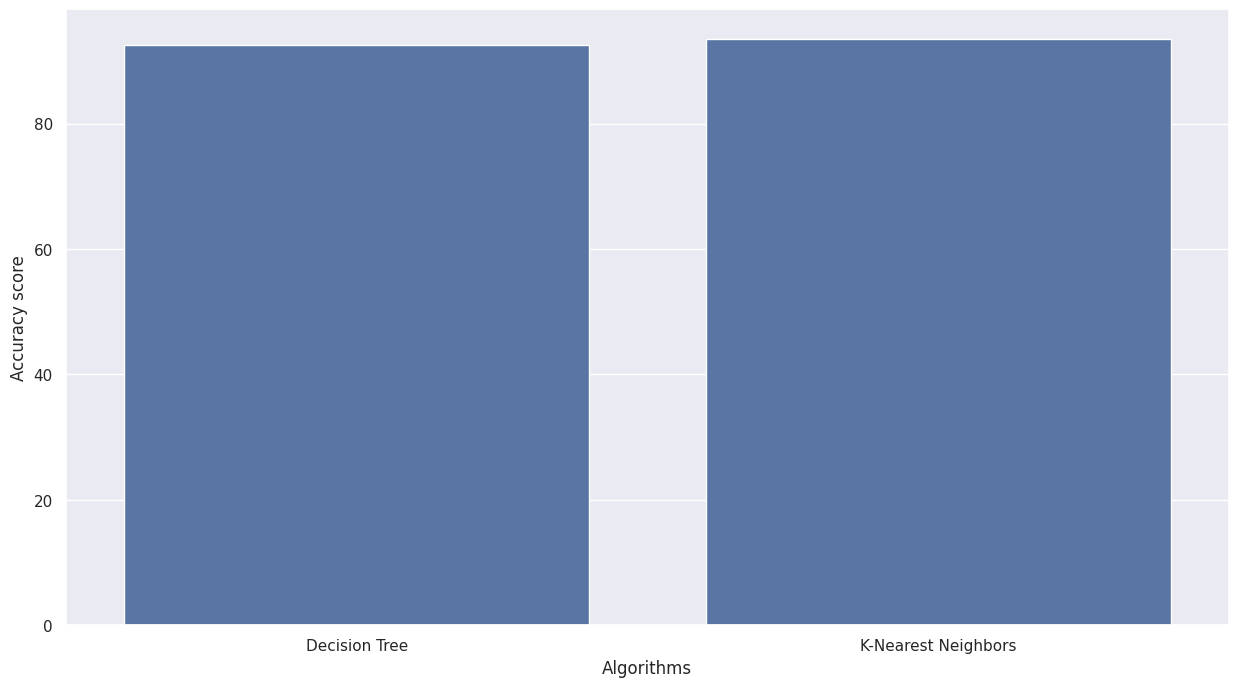

In [9]:
# Install the matplotlib module if necessary
!pip install matplotlib

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Set the figure size
sns.set(rc={'figure.figsize':(15,8)})

# Set the x-axis label
plt.xlabel("Algorithms")

# Set the y-axis label
plt.ylabel("Accuracy score")

# Create a bar plot
sns.barplot(x=algorithms, y=scores)